In [1]:
# !conda create -n CQS python=3.9 -y && activate CQS && pip install git+https://github.com/JiakaiW/CoupledQuantumSystems

In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import qutip
from CoupledQuantumSystems.drive import *
from scipy.optimize import minimize
from CoupledQuantumSystems.IFQ import gfIFQ
from CoupledQuantumSystems.evo import ODEsolve_and_post_process
import os, pickle

In [2]:
EJ = 4
EC = EJ/2
EL = EJ/30

qbt = gfIFQ(EJ = EJ,EC = EC, EL = EL, flux = 0,truncated_dim=20)
e_ops = [qutip.basis(qbt.truncated_dim, i)*qutip.basis(qbt.truncated_dim, i).dag() for i in range(10)]

done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one


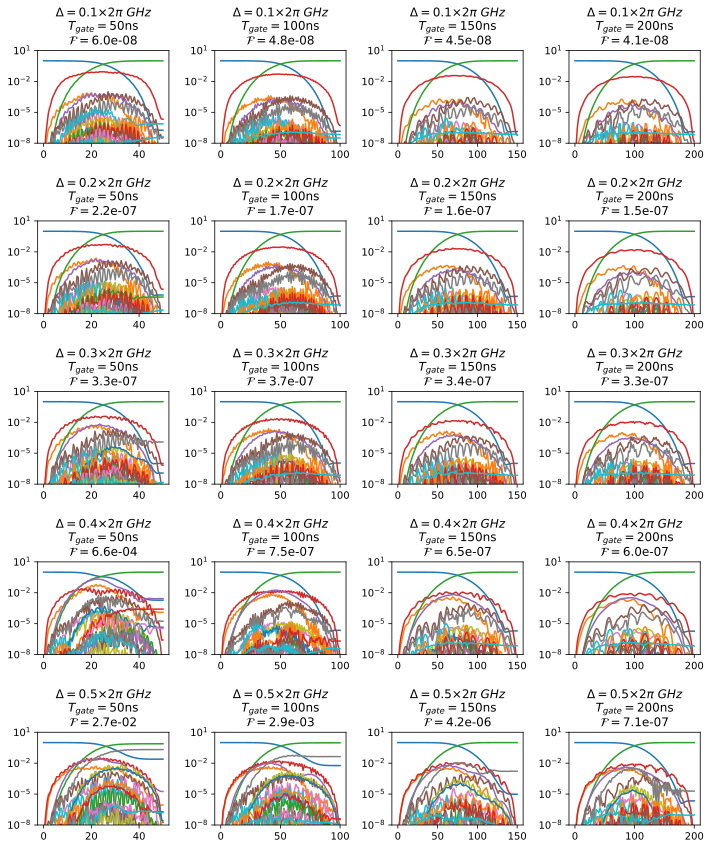

<Figure size 640x480 with 0 Axes>

In [26]:
state_0_dressed = qutip.basis(qbt.truncated_dim, 0)
state_1_dressed = qutip.basis(qbt.truncated_dim, 2)
state_plus_X_dressed = (state_0_dressed +  state_1_dressed).unit()
state_minus_X_dressed = (state_0_dressed - state_1_dressed).unit()
state_plus_Y_dressed = (state_0_dressed + 1j * state_1_dressed).unit()
state_minus_Y_dressed = (state_0_dressed - 1j * state_1_dressed).unit()

initial_states  = [
                state_0_dressed,
                state_1_dressed,
                state_plus_X_dressed,
                state_minus_X_dressed,
                state_plus_Y_dressed,
                state_minus_Y_dressed
                ]

e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(qbt.truncated_dim)]

def truncate_to_computational(state,i,j):
    if state.isket:
        state = qutip.ket2dm(state)
    arr = state.full()
    arr= arr[[i, j], :][:, [i, j]]
    dm = qutip.Qobj(arr)
    dm = dm/dm.tr()
    return dm

zero = qutip.basis(2, 0)
one = qutip.basis(2, 1)
states_ideal  = [zero,
                one,
                (zero +  one).unit(),
                (zero - one).unit(),
                (zero + 1j * one).unit(),
                (zero - 1j *one).unit()]

states_ideal_after_gate = []
for state in states_ideal:
    states_ideal_after_gate.append(qutip.qip.operations.x_gate() * state)

def calc_average_fidelity_with_phase(phase,dms,states_ideal_after_gate):
    gate = qutip.qip.operations.phasegate(phase)
    fid=[]
    for dm,ket_ideal in zip(dms,states_ideal_after_gate):
        fid.append(qutip.fidelity(gate*dm*gate.dag(), ket_ideal))
    return 1-sum(fid)/len(fid)


detuning_arr = np.array([0.1,0.2,0.3,0.4,0.5])
t_duration_arr = np.array([50,100,150,200])

fig,axes = plt.subplots(len(detuning_arr),len(t_duration_arr),figsize = (10,12))

for i,detuning in enumerate(detuning_arr):
    for j, t_duration in enumerate(t_duration_arr):
        filename = f'nevergrad_optimized_results_{detuning}_{t_duration}.json'

        optimization_results = json.load(open(filename))
        
        detuning = optimization_results['detuning']
        t_duration = optimization_results['t_duration']
        best_amp1 = optimization_results['best_amp1']
        best_amp2 = optimization_results['best_amp2']

        tlist = np.linspace(0,t_duration, 101)
    
        pickle_filename = f'nevergrad_optimized_results_{detuning}_{t_duration}.pkl'
        if os.path.exists(pickle_filename):
            with open(pickle_filename, 'rb') as f:
                results = pickle.load(f)
        else:
            # Compute the results (replace this with your actual computation)
            results =  [ODEsolve_and_post_process(
                y0=initial_states[i],
                tlist=tlist,
                static_hamiltonian=qbt.diag_hamiltonian,
                drive_terms=qbt.get_Raman_DRAG_drive_terms(
                            i = 0,
                            j = 3,
                            k = 2,
                            detuning1=detuning,
                            detuning2 = detuning,
                            t_duration=t_duration,
                            shape='sin^2',
                            amp_scaling_factor = 1,
                            amp1_scaling_factor = best_amp1,
                            amp2_scaling_factor = best_amp2,
                            amp1_correction_scaling_factor = 0,
                            amp2_correction_scaling_factor = 0,
                        ),
                c_ops=None,
                e_ops=e_ops,
                print_progress=False
                ) for i in range(len(initial_states))]

            # Store the results to a pickle file
            with open(pickle_filename, 'wb') as f:
                pickle.dump(results, f)
        dms = [truncate_to_computational(result.states[-1], 0,2) for result in results]
        def objective_function(phase):
            return calc_average_fidelity_with_phase(phase[0], dms, states_ideal_after_gate)
        opt_result = minimize(objective_function,x0=  [0],bounds = [(0, 2*np.pi)], method="Powell")
        for exp_idx in range(len(e_ops)):
            axes[i,j].plot(tlist, results[0].expect[exp_idx],label= f"|{exp_idx}>")
        axes[i,j].set_title(rf'''$\Delta=${detuning}$\times 2\pi$ $GHz$
$T_{{gate}}=${int(t_duration)}ns
$\mathcal{{F}}=${opt_result.fun:.1e}''')
        axes[i,j].set_yscale('log')
        axes[i,j].set_ylim(1e-8,1e1)
        print('done one')

plt.tight_layout()
plt.show()

# plt.subplots_adjust(top=0.9)  # Adjust the top to make room for titles
plt.savefig('Raman_coherente.pdf')

 /Users/jiakaiwang/miniconda3/envs/CQS/lib/python3.9/site-packages/CoupledQuantumSystems/IFQ.py: 63

done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one
done one


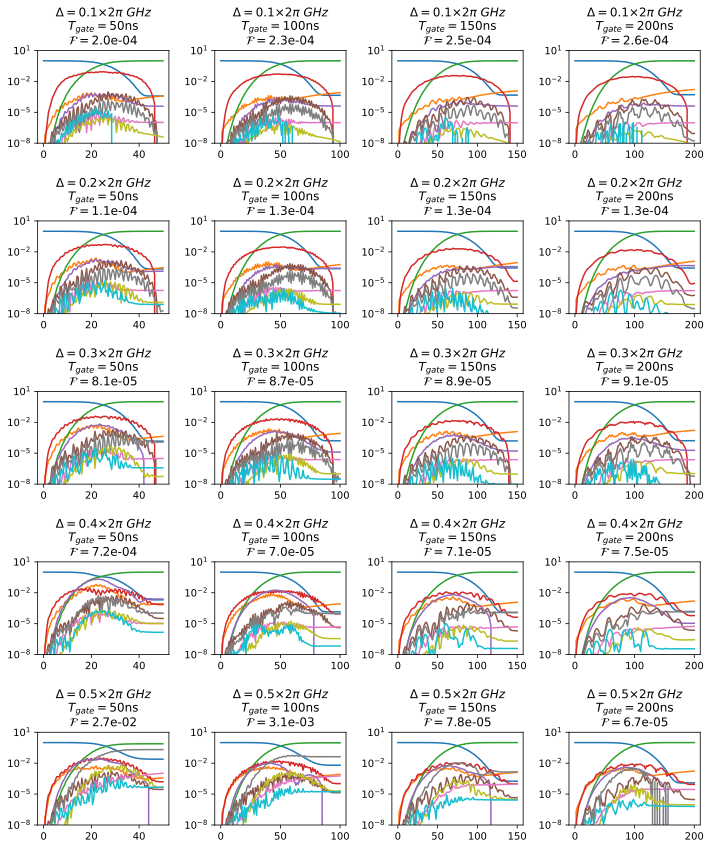

In [25]:
state_0_dressed = qutip.basis(qbt.truncated_dim, 0)
state_1_dressed = qutip.basis(qbt.truncated_dim, 2)
state_plus_X_dressed = (state_0_dressed +  state_1_dressed).unit()
state_minus_X_dressed = (state_0_dressed - state_1_dressed).unit()
state_plus_Y_dressed = (state_0_dressed + 1j * state_1_dressed).unit()
state_minus_Y_dressed = (state_0_dressed - 1j * state_1_dressed).unit()

initial_states  = [
                state_0_dressed,
                state_1_dressed,
                state_plus_X_dressed,
                state_minus_X_dressed,
                state_plus_Y_dressed,
                state_minus_Y_dressed
                ]

e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(qbt.truncated_dim)]

def truncate_to_computational(state,i,j):
    if state.isket:
        state = qutip.ket2dm(state)
    arr = state.full()
    arr= arr[[i, j], :][:, [i, j]]
    dm = qutip.Qobj(arr)
    dm = dm/dm.tr()
    return dm

zero = qutip.basis(2, 0)
one = qutip.basis(2, 1)
states_ideal  = [zero,
                one,
                (zero +  one).unit(),
                (zero - one).unit(),
                (zero + 1j * one).unit(),
                (zero - 1j *one).unit()]

states_ideal_after_gate = []
for state in states_ideal:
    states_ideal_after_gate.append(qutip.qip.operations.x_gate() * state)

def calc_average_fidelity_with_phase(phase,dms,states_ideal_after_gate):
    gate = qutip.qip.operations.phasegate(phase)
    fid=[]
    for dm,ket_ideal in zip(dms,states_ideal_after_gate):
        fid.append(qutip.fidelity(gate*dm*gate.dag(), ket_ideal))
    return 1-sum(fid)/len(fid)

temp_in_mK = 20
Q_cap = 1e5
one_over_f_flux_noise_amplitude = 1e-6

T1_cops = qbt.get_T1_c_ops(temp_in_mK,
                        Q_cap,
                        one_over_f_flux_noise_amplitude) 
Tphi_cops = qbt.get_Tphi_c_ops(one_over_f_flux_noise_amplitude)

c_ops =T1_cops + Tphi_cops


detuning_arr = np.array([0.1,0.2,0.3,0.4,0.5])
t_duration_arr = np.array([50,100,150,200])

fidelity_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
leak_to_e_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
additional_leakage_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
def get_e_pop_j(state, j):
    return qutip.expect(qutip.ket2dm(qutip.basis(qbt.truncated_dim,j)), state)

fig,axes = plt.subplots(len(detuning_arr),len(t_duration_arr),figsize = (10,12))

for i,detuning in enumerate(detuning_arr):
    for j, t_duration in enumerate(t_duration_arr):
        filename = f'nevergrad_optimized_results_{detuning}_{t_duration}.json'

        optimization_results = json.load(open(filename))
        
        detuning = optimization_results['detuning']
        t_duration = optimization_results['t_duration']
        best_amp1 = optimization_results['best_amp1']
        best_amp2 = optimization_results['best_amp2']

        tlist = np.linspace(0,t_duration, 101)
    
        pickle_filename = f'nevergrad_optimized_results_{detuning}_{t_duration}_with_decay.pkl'
        if os.path.exists(pickle_filename):
            with open(pickle_filename, 'rb') as f:
                results = pickle.load(f)
        else:
            # Compute the results (replace this with your actual computation)
            results =  qbt.run_qutip_mesolve_parrallel(
                initial_states,
                tlist,
                drive_terms= qbt.get_Raman_DRAG_drive_terms(
                            i = 0,
                            j = 3,
                            k = 2,
                            detuning1=detuning,
                            detuning2 = detuning,
                            t_duration=t_duration,
                            shape='sin^2',
                            amp_scaling_factor = 1,
                            amp1_scaling_factor = best_amp1,
                            amp2_scaling_factor = best_amp2,
                            amp1_correction_scaling_factor = 0,
                            amp2_correction_scaling_factor = 0,
                        ),
                c_ops=c_ops,
                e_ops=e_ops,
                post_processing=None,
            )
            # Store the results to a pickle file
            with open(pickle_filename, 'wb') as f:
                pickle.dump(results, f)
        dms = [truncate_to_computational(result.states[-1], 0,2) for result in results]
        def objective_function(phase):
            return calc_average_fidelity_with_phase(phase[0], dms, states_ideal_after_gate)
        opt_result = minimize(objective_function,x0=  [0],bounds = [(0, 2*np.pi)], method="Powell")
        for exp_idx in range(len(e_ops))[:10]:
            axes[i,j].plot(tlist, results[0].expect[exp_idx],label= f"|{exp_idx}>")
        axes[i,j].set_title(rf'''$\Delta=${detuning}$\times 2\pi$ $GHz$
$T_{{gate}}=${int(t_duration)}ns
$\mathcal{{F}}=${opt_result.fun:.1e}''')
        axes[i,j].set_yscale('log')
        axes[i,j].set_ylim(1e-8,1e1)
        print('done one')

        fidelity_arr[i,j] = opt_result.fun
        leakage_to_list = []
        for l in range(len(e_ops)):
            leakage_to_list.append( [get_e_pop_j(result.states[-1], l) for result in results])
        leak_to_e_arr[i,j] = np.mean(leakage_to_list[1])
        additional_leakage_arr[i,j]= np.sum(np.abs(np.array(leakage_to_list)))/len(results)- np.mean(leakage_to_list[1]) - np.mean(leakage_to_list[0]) - np.mean(leakage_to_list[2])
        

plt.tight_layout()

# plt.subplots_adjust(top=0.9)  # Adjust the top to make room for titles
plt.savefig('Raman_with_decay.pdf')

plt.show()


done one


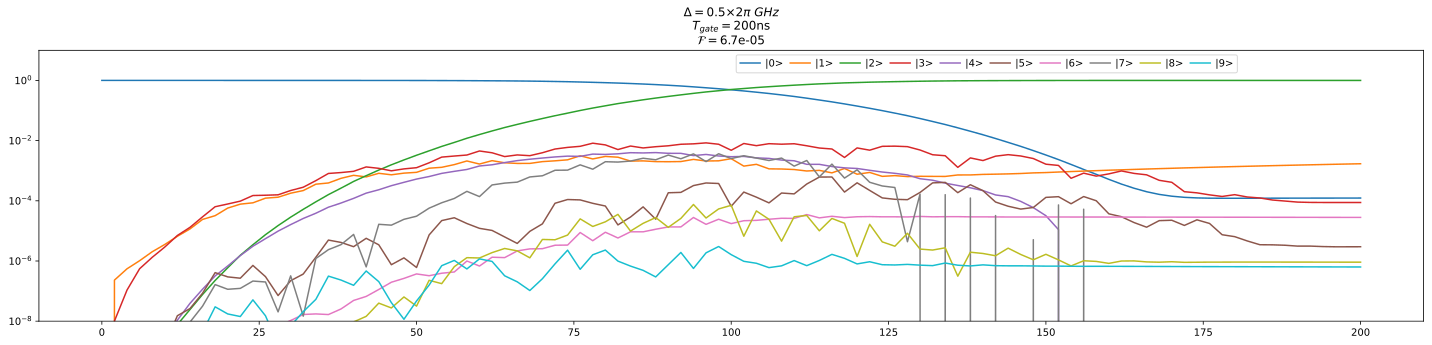

In [34]:
# state_0_dressed = qutip.basis(qbt.truncated_dim, 0)
# state_1_dressed = qutip.basis(qbt.truncated_dim, 2)
# state_plus_X_dressed = (state_0_dressed +  state_1_dressed).unit()
# state_minus_X_dressed = (state_0_dressed - state_1_dressed).unit()
# state_plus_Y_dressed = (state_0_dressed + 1j * state_1_dressed).unit()
# state_minus_Y_dressed = (state_0_dressed - 1j * state_1_dressed).unit()

# initial_states  = [
#                 state_0_dressed,
#                 state_1_dressed,
#                 state_plus_X_dressed,
#                 state_minus_X_dressed,
#                 state_plus_Y_dressed,
#                 state_minus_Y_dressed
#                 ]

# e_ops = [qutip.ket2dm(qutip.basis(qbt.truncated_dim, i)) for i in range(qbt.truncated_dim)]

# def truncate_to_computational(state,i,j):
#     if state.isket:
#         state = qutip.ket2dm(state)
#     arr = state.full()
#     arr= arr[[i, j], :][:, [i, j]]
#     dm = qutip.Qobj(arr)
#     dm = dm/dm.tr()
#     return dm

# zero = qutip.basis(2, 0)
# one = qutip.basis(2, 1)
# states_ideal  = [zero,
#                 one,
#                 (zero +  one).unit(),
#                 (zero - one).unit(),
#                 (zero + 1j * one).unit(),
#                 (zero - 1j *one).unit()]

# states_ideal_after_gate = []
# for state in states_ideal:
#     states_ideal_after_gate.append(qutip.qip.operations.x_gate() * state)

# def calc_average_fidelity_with_phase(phase,dms,states_ideal_after_gate):
#     gate = qutip.qip.operations.phasegate(phase)
#     fid=[]
#     for dm,ket_ideal in zip(dms,states_ideal_after_gate):
#         fid.append(qutip.fidelity(gate*dm*gate.dag(), ket_ideal))
#     return 1-sum(fid)/len(fid)

# temp_in_mK = 20
# Q_cap = 1e5
# one_over_f_flux_noise_amplitude = 1e-6

# T1_cops = qbt.get_T1_c_ops(temp_in_mK,
#                         Q_cap,
#                         one_over_f_flux_noise_amplitude) 
# Tphi_cops = qbt.get_Tphi_c_ops(one_over_f_flux_noise_amplitude)

# c_ops =T1_cops + Tphi_cops


# detuning_arr = np.array([0.1,0.2,0.3,0.4,0.5])
# t_duration_arr = np.array([50,100,150,200])

# fidelity_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
# leak_to_e_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
# additional_leakage_arr = np.zeros(shape = (len(detuning_arr),len(t_duration_arr)))
# def get_e_pop_j(state, j):
#     return qutip.expect(qutip.ket2dm(qutip.basis(qbt.truncated_dim,j)), state)

fig,ax = plt.subplots(1,1,figsize = (20,5))

# i = 0
# detuning = detuning_arr[i]
# j = 0
# t_duration = t_duration_arr[j]

# filename = f'nevergrad_optimized_results_{detuning}_{t_duration}.json'

# optimization_results = json.load(open(filename))

# detuning = optimization_results['detuning']
# t_duration = optimization_results['t_duration']
# best_amp1 = optimization_results['best_amp1']
# best_amp2 = optimization_results['best_amp2']

# tlist = np.linspace(0,t_duration, 101)

# pickle_filename = f'nevergrad_optimized_results_{detuning}_{t_duration}_with_decay.pkl'
# if os.path.exists(pickle_filename):
#     with open(pickle_filename, 'rb') as f:
#         results = pickle.load(f)
# else:
#     # Compute the results (replace this with your actual computation)
#     results =  qbt.run_qutip_mesolve_parrallel(
#         initial_states,
#         tlist,
#         drive_terms= qbt.get_Raman_DRAG_drive_terms(
#                     i = 0,
#                     j = 3,
#                     k = 2,
#                     detuning1=detuning,
#                     detuning2 = detuning,
#                     t_duration=t_duration,
#                     shape='sin^2',
#                     amp_scaling_factor = 1,
#                     amp1_scaling_factor = best_amp1,
#                     amp2_scaling_factor = best_amp2,
#                     amp1_correction_scaling_factor = 0,
#                     amp2_correction_scaling_factor = 0,
#                 ),
#         c_ops=c_ops,
#         e_ops=e_ops,
#         post_processing=None,
#     )
#     # Store the results to a pickle file
#     with open(pickle_filename, 'wb') as f:
#         pickle.dump(results, f)
# dms = [truncate_to_computational(result.states[-1], 0,2) for result in results]
# def objective_function(phase):
#     return calc_average_fidelity_with_phase(phase[0], dms, states_ideal_after_gate)
# opt_result = minimize(objective_function,x0=  [0],bounds = [(0, 2*np.pi)], method="Powell")
for exp_idx in range(len(e_ops))[:10]:
    ax.plot(tlist, results[0].expect[exp_idx],label= f"|{exp_idx}>")
ax.set_title(rf'''$\Delta=${detuning}$\times 2\pi$ $GHz$
$T_{{gate}}=${int(t_duration)}ns
$\mathcal{{F}}=${opt_result.fun:.1e}''')
ax.set_yscale('log')
ax.set_ylim(1e-8,1e1)
print('done one')

ax.legend(
    loc='center left',
    ncols=10,
    bbox_to_anchor=(0.5, 0.95),  # Adjust position
    columnspacing=0.7,        # Reduce space between columns
    handletextpad=0.5,        # Reduce space between markers and text
    # fontsize='small',         # Reduce font size
)


plt.tight_layout()

# plt.subplots_adjust(top=0.9)  # Adjust the top to make room for titles
plt.savefig('raman_legend.pdf')

plt.show()


A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
 /var/folders/9k/z8bpg3hj3d9841ggs75xmwxw0000gn/T/ipykernel_13681/3067884552.py: 51

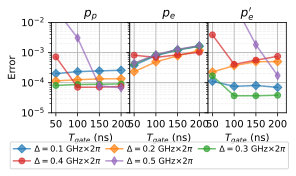

In [43]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

l = 0.15
w = 0.28
b = 0.3
t = 0.9
fig = plt.figure(figsize=(3.9, 2.1)) 
gs0 = fig.add_gridspec(nrows=1, ncols=1,left=l, right=l+w,bottom=b,top = t)
gs1 = fig.add_gridspec(nrows=1, ncols=1,left=l+w, right=l+w*2,bottom=b,top = t)
gs2 = fig.add_gridspec(nrows=1, ncols=1,left=l+w*2, right=l+w*3,bottom=b,top = t)

axs = [fig.add_subplot(gs0[0]),  fig.add_subplot(gs1[0]),  fig.add_subplot(gs2[0])]
markers = ['D','D','o','o','d']
for j,title,data_arr in zip([0,1,2],[r"$p_p$", r"$p_e$", r"$p_e'$"], [fidelity_arr,leak_to_e_arr, additional_leakage_arr]):
    ax = axs[j]
    for i in [0,1,2,3, 4]:
        ax.plot(t_duration_arr, data_arr[i], label=rf"$\Delta={detuning_arr[i]}$ GHz$\times2\pi$", marker=markers[i],alpha=0.7)
    ax.set_yscale('log')
    ax.set_xticks([50, 100, 150, 200])
    ax.set_xlim(40,220)
    ax.set_ylim(1e-5,1e-2)
    ax.set_xlabel(r"$T_{gate}$ (ns)")
    ax.set_title(title)

    # Major and minor ticks for logarithmic scale
    ax.yaxis.set_major_locator(ticker.LogLocator(base=10.0, numticks=10))  # Set major ticks
    ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs='auto', numticks=10))  # Set minor ticks

    ax.grid(which='major', linestyle='-')  # Solid grid lines for major ticks
    ax.grid(which='minor', linestyle='--',alpha=0.2)  # Dashed grid lines for minor ticks
axs[0].set_ylabel('Error')
axs[1].set_ylabel('')
axs[1].set_yticklabels([])
axs[2].set_ylabel('')
axs[2].set_yticklabels([])

handles, labels = axs[0].get_legend_handles_labels()

ncols = 3  # Adjust based on desired layout
nrows = (len(handles) + ncols - 1) // ncols  # Calculate rows dynamically

# Pad to ensure a full grid for reshaping
while len(handles) < ncols * nrows:
    handles.append(None)
    labels.append("")

handles_ordered = np.array(handles).reshape(2, 3).T.flatten().tolist()
labels_ordered = np.array(labels).reshape(2, 3).T.flatten().tolist()

fig.legend(handles_ordered, 
           labels_ordered, 
           loc='lower center', 
           ncol=3, 
           bbox_to_anchor=(0.5, -0.1),
           columnspacing=0.7,        # Reduce space between columns
            handletextpad=0.5,        # Reduce space between markers and text
            fontsize='small',
    )

fig.savefig('raman_comprehensive_new_results.pdf')

In [13]:
len(handles)

6

In [45]:
np.linspace(170, 250, 9)

array([170., 180., 190., 200., 210., 220., 230., 240., 250.])